In [110]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re
 
def get_all_links(url):
    html_page = urlopen(url)
    soup = BeautifulSoup(html_page, "lxml")
    links = []
 
    for link in soup.findAll('a', attrs={'href': re.compile("/hurricanes/2017")}):
        links.append('http://weather.unisys.com' + link.get('href'))
 
    return links

In [111]:
def extract_2017_links():
    page1_link = 'http://weather.unisys.com/hurricanes/search?field_ocean_target_id=All&year[year_val]=2017&category=All&type=All&sort_bef_combine=field_start_date_value%20DESC&items_per_page=36'
    page2_link = 'http://weather.unisys.com/hurricanes/search?field_ocean_target_id=All&year[0]=2017-01-01&year[1]=2017-12-31&year[2]=2017&category=All&type=All&sort_bef_combine=field_start_date_value%20DESC&items_per_page=36&sort_by=field_start_date_value&sort_order=DESC&page=1'
    
    return get_all_links(page1_link) + get_all_links(page2_link)

In [112]:
extract_2017_links()

['http://weather.unisys.com/hurricanes/2017/south-indian/hilda',
 'http://weather.unisys.com/hurricanes/2017/north-indian/four',
 'http://weather.unisys.com/hurricanes/2017/south-indian/dahlia',
 'http://weather.unisys.com/hurricanes/2017/north-indian/ockhi',
 'http://weather.unisys.com/hurricanes/2017/north-indian/twentynine',
 'http://weather.unisys.com/hurricanes/2017/atlantic/rina',
 'http://weather.unisys.com/hurricanes/2017/atlantic/philippe',
 'http://weather.unisys.com/hurricanes/2017/east-pacific/selma',
 'http://weather.unisys.com/hurricanes/2017/atlantic/ophelia',
 'http://weather.unisys.com/hurricanes/2017/atlantic/nate',
 'http://weather.unisys.com/hurricanes/2017/east-pacific/ramon',
 'http://weather.unisys.com/hurricanes/2017/atlantic/maria',
 'http://weather.unisys.com/hurricanes/2017/atlantic/lee',
 'http://weather.unisys.com/hurricanes/2017/atlantic/irma',
 'http://weather.unisys.com/hurricanes/2017/atlantic/katia',
 'http://weather.unisys.com/hurricanes/2017/atlantic

In [113]:
summary_links = [
 'http://weather.unisys.com/hurricanes/2017/west-pacific',
 'http://weather.unisys.com/hurricanes/2017/south-pacific',
 'http://weather.unisys.com/hurricanes/2017/south-indian',
 'http://weather.unisys.com/hurricanes/2017/north-indian',
 'http://weather.unisys.com/hurricanes/2017/east-pacific',
 'http://weather.unisys.com/hurricanes/2017/atlantic'
]

correct_tables_links = [x for x in extract_2017_links() if x not in summary_links]
correct_tables_links

['http://weather.unisys.com/hurricanes/2017/south-indian/hilda',
 'http://weather.unisys.com/hurricanes/2017/north-indian/four',
 'http://weather.unisys.com/hurricanes/2017/south-indian/dahlia',
 'http://weather.unisys.com/hurricanes/2017/north-indian/ockhi',
 'http://weather.unisys.com/hurricanes/2017/north-indian/twentynine',
 'http://weather.unisys.com/hurricanes/2017/atlantic/rina',
 'http://weather.unisys.com/hurricanes/2017/atlantic/philippe',
 'http://weather.unisys.com/hurricanes/2017/east-pacific/selma',
 'http://weather.unisys.com/hurricanes/2017/atlantic/ophelia',
 'http://weather.unisys.com/hurricanes/2017/atlantic/nate',
 'http://weather.unisys.com/hurricanes/2017/east-pacific/ramon',
 'http://weather.unisys.com/hurricanes/2017/atlantic/maria',
 'http://weather.unisys.com/hurricanes/2017/atlantic/lee',
 'http://weather.unisys.com/hurricanes/2017/atlantic/irma',
 'http://weather.unisys.com/hurricanes/2017/atlantic/katia',
 'http://weather.unisys.com/hurricanes/2017/atlantic

In [125]:
def get_info(url):
    html_page = urlopen(url)
    soup = BeautifulSoup(html_page, "lxml")
    links = []
 
    for link in soup.findAll('a', attrs={'href': re.compile("/file/")}):
        links.append('http://weather.unisys.com' + link.get('href'))
    
    text_url = links[0]
    
    with urlopen(text_url) as response:
        html_response = response.read()
        encoding = response.headers.get_content_charset('utf-8')
        decoded_html = html_response.decode(encoding)
        
        return decoded_html

In [126]:
link0_content = get_info(correct_tables_links[0])
print(link0_content)

Date: 27-28 DEC 2017
Tropical Storm HILDA
ADV  LAT    LON      TIME     WIND  PR  STAT
  1 -18.80  121.60 12/27/18Z   40     - TROPICAL STORM
  2 -19.40  121.70 12/28/00Z   35     - TROPICAL STORM



In [114]:
from datetime import datetime
from io import StringIO

def parse_date(z_time):
    return datetime.strptime('2017' + z_time[:-1].replace('/',' '), '%Y %m %d %H')

def parse_data(text):
    result = {}
    lines = text.split('\n')
    result['date'] = lines[0][6:]
    result['category'] = ' '.join(lines[1].split()[:-1])
    result['name'] = lines[1].split()[-1]
    
    path = pd.DataFrame(columns=['ADV', 'LAT', 'LON', 'TIME', 'WIND', 'PR', 'STAT'])
    row = 0
    if len(lines) > 3:
        for line in lines[3:]:
            if len(line) < 3:
                break
            path.loc[row] = [int(line[:3]), 
                             float(line[3:10]), 
                             float(line[10:18]), 
                             parse_date(line[18:28]), 
                             int(line[28:35]) if line[28:35].split() else -1, 
                             line[35:39].strip(), 
                             line[39:].strip()]
            row += 1
            
    result['path'] = path
    
    return result

In [141]:
result = parse_data(link0_content)
result

{'category': 'Tropical Storm',
 'date': '27-28 DEC 2017',
 'name': 'HILDA',
 'path':   ADV   LAT    LON                TIME WIND PR            STAT
 0   1 -18.8  121.6 2017-12-27 18:00:00   40  -  TROPICAL STORM
 1   2 -19.4  121.7 2017-12-28 00:00:00   35  -  TROPICAL STORM}

In [116]:
result['path']

,ADV,LAT,LON,TIME,WIND,PR,STAT
0,1,-18.8,121.6,2017-12-27 18:00:00,40,-,TROPICAL STORM
1,2,-19.4,121.7,2017-12-28 00:00:00,35,-,TROPICAL STORM


In [128]:
hurricane_list=[]
for link in correct_tables_links:
    hurricane_list.append(parse_data(get_info(link)))
    

In [130]:
hurricane_list

[{'category': 'Tropical Storm',
  'date': '27-28 DEC 2017',
  'name': 'HILDA',
  'path':   ADV   LAT    LON                TIME WIND PR            STAT
  0   1 -18.8  121.6 2017-12-27 18:00:00   40  -  TROPICAL STORM
  1   2 -19.4  121.7 2017-12-28 00:00:00   35  -  TROPICAL STORM},
 {'category': 'Tropical Storm',
  'date': '08-09 DEC 2017',
  'name': 'FOUR',
  'path':   ADV   LAT   LON                TIME WIND PR            STAT
  0   1  18.3  86.8 2017-12-08 18:00:00   40  -  TROPICAL STORM
  1   2  19.3  86.9 2017-12-09 00:00:00   40  -  TROPICAL STORM
  2   3  18.8  86.8 2017-12-09 06:00:00   35  -  TROPICAL STORM},
 {'category': 'Tropical Storm',
  'date': '30 NOV-03 DEC 2017',
  'name': 'DAHLIA',
  'path':    ADV   LAT    LON                TIME WIND PR            STAT
  0    1  -8.9  104.4 2017-11-30 00:00:00   35  -  TROPICAL STORM
  1    2  -8.9  106.2 2017-11-30 06:00:00   35  -  TROPICAL STORM
  2    3  -9.3  107.6 2017-11-30 12:00:00   45  -  TROPICAL STORM
  3    4  -9.6  

In [117]:
stats = set()
for link in correct_tables_links:
    stats.update(set(parse_data(get_info(link))['path']['STAT']))
stats

{'CYCLONE-1',
 'CYCLONE-2',
 'CYCLONE-3',
 'CYCLONE-4',
 'HURRICANE-1',
 'HURRICANE-2',
 'HURRICANE-3',
 'HURRICANE-4',
 'HURRICANE-5',
 'SUBTROPICAL DEPRESSION',
 'TROPICAL DEPRESSION',
 'TROPICAL STORM'}

In [132]:
speed = {
 'CYCLONE-1': 75,
 'CYCLONE-2': 100,
 'CYCLONE-3': 130,
 'CYCLONE-4': 180,
 'HURRICANE-1': 130,
 'HURRICANE-2': 165,
 'HURRICANE-3': 180,
 'HURRICANE-4': 235,
 'HURRICANE-5': 254,
 'SUBTROPICAL DEPRESSION': 30,
 'TROPICAL DEPRESSION': 50,
 'TROPICAL STORM': 100}

def impute_wind_data(df):
    for index, row in df.iterrows():
        if row['WIND'] == -1:
            row['WIND'] = speed(row['STAT'])
            
for item in hurricane_list:
    impute_wind_data(item['path'])

In [133]:
hurricane_list

[{'category': 'Tropical Storm',
  'date': '27-28 DEC 2017',
  'name': 'HILDA',
  'path':   ADV   LAT    LON                TIME WIND PR            STAT
  0   1 -18.8  121.6 2017-12-27 18:00:00   40  -  TROPICAL STORM
  1   2 -19.4  121.7 2017-12-28 00:00:00   35  -  TROPICAL STORM},
 {'category': 'Tropical Storm',
  'date': '08-09 DEC 2017',
  'name': 'FOUR',
  'path':   ADV   LAT   LON                TIME WIND PR            STAT
  0   1  18.3  86.8 2017-12-08 18:00:00   40  -  TROPICAL STORM
  1   2  19.3  86.9 2017-12-09 00:00:00   40  -  TROPICAL STORM
  2   3  18.8  86.8 2017-12-09 06:00:00   35  -  TROPICAL STORM},
 {'category': 'Tropical Storm',
  'date': '30 NOV-03 DEC 2017',
  'name': 'DAHLIA',
  'path':    ADV   LAT    LON                TIME WIND PR            STAT
  0    1  -8.9  104.4 2017-11-30 00:00:00   35  -  TROPICAL STORM
  1    2  -8.9  106.2 2017-11-30 06:00:00   35  -  TROPICAL STORM
  2    3  -9.3  107.6 2017-11-30 12:00:00   45  -  TROPICAL STORM
  3    4  -9.6  

E:\Anachonda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
E:\Anachonda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


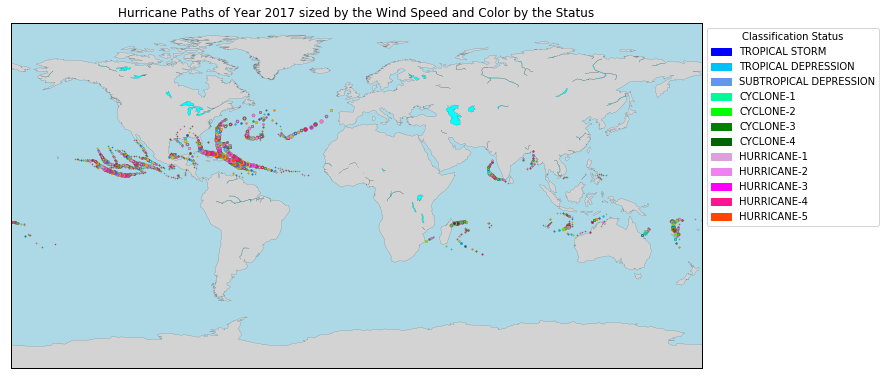

In [155]:
fig = plt.figure(figsize=(10,8))
#my_dpi=450
#plt.figure(figsize=(2000/my_dpi, 1800/my_dpi), dpi=my_dpi)
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
# draw coastlines.
m.drawcoastlines(linewidth=0.1)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='lightblue')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='lightgray',lake_color='aqua')

def pltcolor(l):
    if l =='TROPICAL STORM':
        col = 'blue'
    elif l =='TROPICAL DEPRESSION':
        col = 'deepskyblue'
    elif l =='SUBTROPICAL DEPRESSION':
        col = 'cornflowerblue'
    elif l =='CYCLONE-1':
        col = 'mediumspringgreen'
    elif l =='CYCLONE-2':
        col = 'lime'
    elif l =='CYCLONE-3':
        col = 'green'
    elif l =='CYCLONE-4':
        col = 'darkgreen'
    elif l =='HURRICANE-1':
        col = 'plum'
    elif l =='HURRICANE-2':
        col = 'violet'
    elif l =='HURRICANE-3':
        col = 'magenta'
    elif l =='HURRICANE-4':
        col = 'deeppink'
    elif l =='HURRICANE-5':
        col = 'orangered'
    else:
        col = 'crimson'
    return col

def pltsize(l):
    if l < 40:
        col = 0.4
    elif l >= 40 and l < 50:
        col = 0.8
    elif l >= 50 and l < 60:
        col = 1.2
    elif l >= 60 and l < 70:
        col = 1.6
    elif l >= 70 and l < 80:
        col = 2
    elif l >= 80 and l < 90:
        col = 2.4
    elif l >= 90 and l < 100:
        col = 2.8
    elif l >= 100 and l < 110:
        col = 3.2
    elif l >= 110 and l < 120:
        col = 3.6
    elif l >= 120 and l < 130:
        col = 4
    elif l >= 130 and l < 140:
        col = 4.4
    elif l >=140 and l < 150:
        col = 4.8
    else:
        col = 5
    return col

for item in hurricane_list:
    for index, row in item['path'].iterrows():
        x,y=m(row['LON'],row['LAT'])
        m.plot(x, y, marker='o', markerfacecolor=pltcolor(row['STAT']), markersize=pltsize(row['WIND']))
#create legend
levels_color = [mpatches.Patch(color='blue', label='TROPICAL STORM'),
          mpatches.Patch(color='deepskyblue', label='TROPICAL DEPRESSION'),
          mpatches.Patch(color='cornflowerblue', label='SUBTROPICAL DEPRESSION'),
          mpatches.Patch(color='mediumspringgreen', label='CYCLONE-1'),
          mpatches.Patch(color='lime', label='CYCLONE-2'),
          mpatches.Patch(color='green', label='CYCLONE-3'),
          mpatches.Patch(color='darkgreen', label='CYCLONE-4'),
          mpatches.Patch(color='plum', label='HURRICANE-1'),
          mpatches.Patch(color='violet', label='HURRICANE-2'),
          mpatches.Patch(color='magenta', label='HURRICANE-3'),
          mpatches.Patch(color='deeppink', label='HURRICANE-4'),
          mpatches.Patch(color='orangered', label='HURRICANE-5')]


plt.legend(handles=levels_color, title='Classification Status',bbox_to_anchor=(1,1))

plt.title("Hurricane Paths of Year 2017 sized by the Wind Speed and Color by the Status")
plt.tight_layout()
plt.show()

E:\Anachonda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
E:\Anachonda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


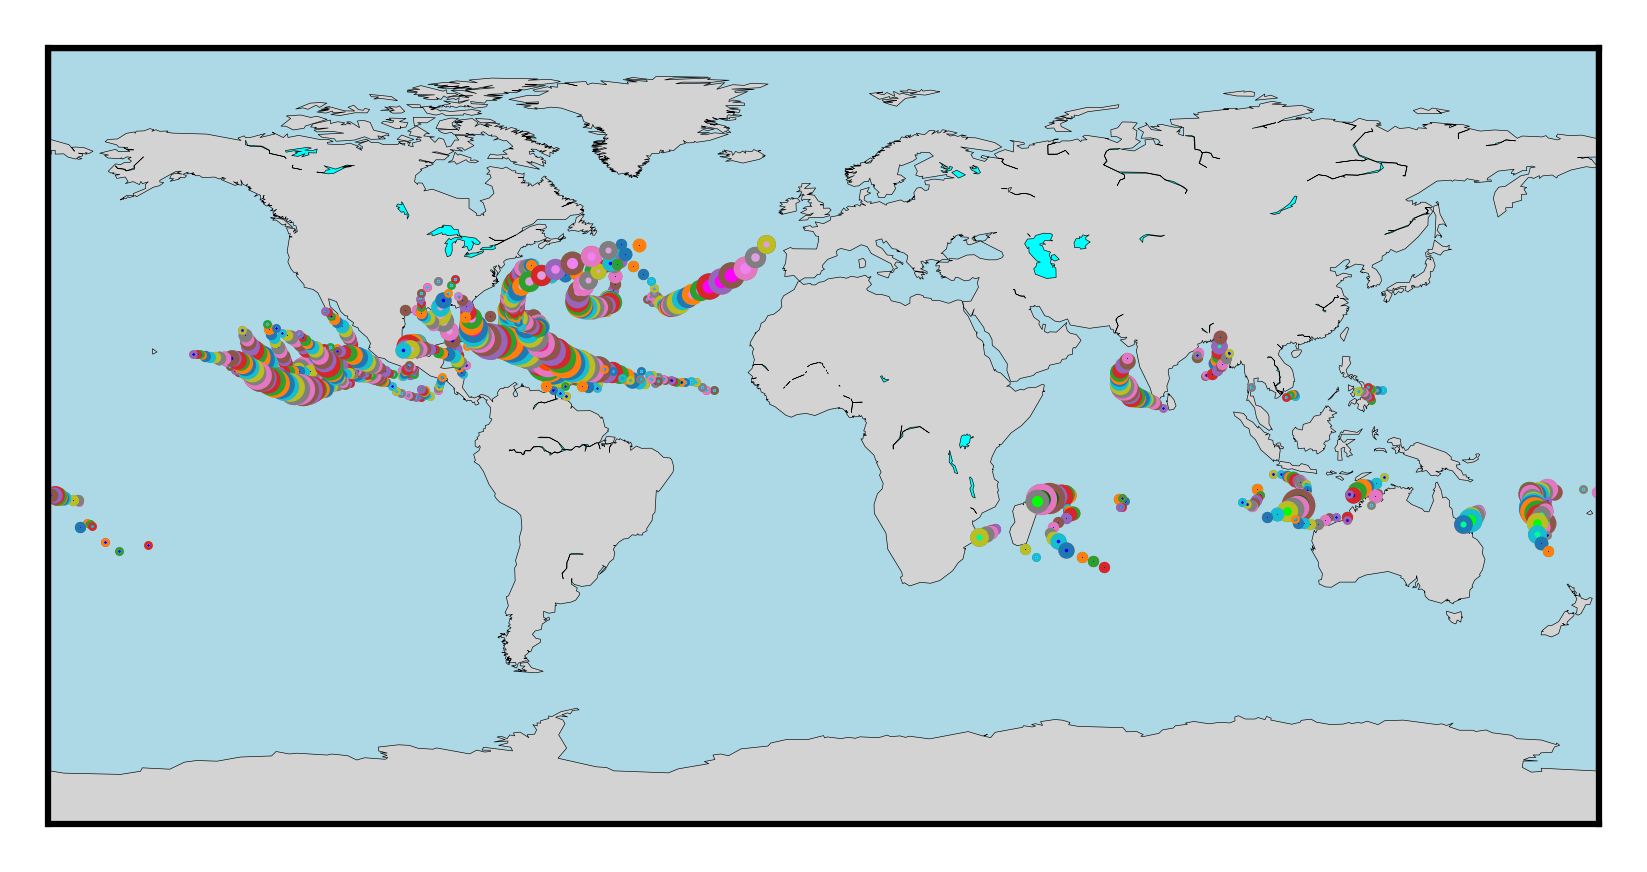

In [157]:
fig = plt.figure(figsize=(10,8))
my_dpi=450
plt.figure(figsize=(2000/my_dpi, 1800/my_dpi), dpi=my_dpi)
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
# draw coastlines.
m.drawcoastlines(linewidth=0.1)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='lightblue')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='lightgray',lake_color='aqua')

def pltcolor(l):
    if l =='TROPICAL STORM':
        col = 'blue'
    elif l =='TROPICAL DEPRESSION':
        col = 'deepskyblue'
    elif l =='SUBTROPICAL DEPRESSION':
        col = 'cornflowerblue'
    elif l =='CYCLONE-1':
        col = 'mediumspringgreen'
    elif l =='CYCLONE-2':
        col = 'lime'
    elif l =='CYCLONE-3':
        col = 'green'
    elif l =='CYCLONE-4':
        col = 'darkgreen'
    elif l =='HURRICANE-1':
        col = 'plum'
    elif l =='HURRICANE-2':
        col = 'violet'
    elif l =='HURRICANE-3':
        col = 'magenta'
    elif l =='HURRICANE-4':
        col = 'deeppink'
    elif l =='HURRICANE-5':
        col = 'orangered'
    else:
        col = 'crimson'
    return col

def pltsize(l):
    if l < 40:
        col = 0.4
    elif l >= 40 and l < 50:
        col = 0.8
    elif l >= 50 and l < 60:
        col = 1.2
    elif l >= 60 and l < 70:
        col = 1.6
    elif l >= 70 and l < 80:
        col = 2
    elif l >= 80 and l < 90:
        col = 2.4
    elif l >= 90 and l < 100:
        col = 2.8
    elif l >= 100 and l < 110:
        col = 3.2
    elif l >= 110 and l < 120:
        col = 3.6
    elif l >= 120 and l < 130:
        col = 4
    elif l >= 130 and l < 140:
        col = 4.4
    elif l >=140 and l < 150:
        col = 4.8
    else:
        col = 5
    return col

for item in hurricane_list:
    for index, row in item['path'].iterrows():
        x,y=m(row['LON'],row['LAT'])
        m.plot(x, y, marker='o', markerfacecolor=pltcolor(row['STAT']), markersize=pltsize(row['WIND']))
#create legend
# levels_color = [mpatches.Patch(color='blue', label='TROPICAL STORM'),
#           mpatches.Patch(color='deepskyblue', label='TROPICAL DEPRESSION'),
#           mpatches.Patch(color='cornflowerblue', label='SUBTROPICAL DEPRESSION'),
#           mpatches.Patch(color='mediumspringgreen', label='CYCLONE-1'),
#           mpatches.Patch(color='lime', label='CYCLONE-2'),
#           mpatches.Patch(color='green', label='CYCLONE-3'),
#           mpatches.Patch(color='darkgreen', label='CYCLONE-4'),
#           mpatches.Patch(color='plum', label='HURRICANE-1'),
#           mpatches.Patch(color='violet', label='HURRICANE-2'),
#           mpatches.Patch(color='magenta', label='HURRICANE-3'),
#           mpatches.Patch(color='deeppink', label='HURRICANE-4'),
#           mpatches.Patch(color='orangered', label='HURRICANE-5')]


#plt.legend(handles=levels_color, title='Classification Status',bbox_to_anchor=(1,1))

#plt.title("Hurricane Paths of Year 2017 sized by the Wind Speed and Color by the Status")
#plt.tight_layout()
plt.show()